In [ ]:
#Install library kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Make a directory named “.kaggle”
!mkdir ~/.kaggle

In [ ]:
#Copy the “kaggle.json” into this new directory
!cp kaggle.json ~/.kaggle/

In [ ]:
#Allocate the required permission for this file.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Download datasets FER2013 from kaggle
!kaggle datasets download msambare/fer2013

 63% 38.0M/60.3M [00:00<00:00, 208MB/s]
100% 60.3M/60.3M [00:00<00:00, 213MB/s]


In [ ]:
#Unzip the datasets
!unzip -u "/content/fer2013.zip" -d "/content/FER2013"

Streaming output truncated to the last 5000 lines.
  inflating: /content/FER2013/train/sad/Training_65242339.jpg  
  inflating: /content/FER2013/train/sad/Training_65267116.jpg  
  inflating: /content/FER2013/train/sad/Training_65275626.jpg  
  inflating: /content/FER2013/train/sad/Training_6529266.jpg  
  inflating: /content/FER2013/train/sad/Training_65329617.jpg  
  inflating: /content/FER2013/train/sad/Training_65338712.jpg  
  inflating: /content/FER2013/train/sad/Training_65338797.jpg  
  inflating: /content/FER2013/train/sad/Training_65387162.jpg  
  inflating: /content/FER2013/train/sad/Training_65404494.jpg  
  inflating: /content/FER2013/train/sad/Training_65426218.jpg  
  inflating: /content/FER2013/train/sad/Training_65430136.jpg  
  inflating: /content/FER2013/train/sad/Training_65437377.jpg  
  inflating: /content/FER2013/train/sad/Training_6545735.jpg  
  inflating: /content/FER2013/train/sad/Training_65463385.jpg  
  inflating: /content/FER2013/train/sad/Training_654739

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
training_data = "/content/FER2013/train" # Directory containing the training data
test_data = "/content/FER2013/test"  # Directory containing the validation data

In [ ]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory = training_data,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 16,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_data,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 16,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [ ]:
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import tensorflow as tf

# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())

# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
model.add(BatchNormalization())

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
model.add(BatchNormalization())

# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())

# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu'))

# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback]
)

Epoch 1/50
1436/1436 [==============================] - ETA: 0s - loss: 2.0880 - accuracy: 0.2295
Epoch 1: val_accuracy improved from -inf to 0.31983, saving model to model_weights.h5
1436/1436 [==============================] - 616s 427ms/step - loss: 2.0880 - accuracy: 0.2295 - val_loss: 1.6790 - val_accuracy: 0.3198
Epoch 2/50
1436/1436 [==============================] - ETA: 0s - loss: 1.6425 - accuracy: 0.3511
Epoch 2: val_accuracy improved from 0.31983 to 0.44134, saving model to model_weights.h5
1436/1436 [==============================] - 612s 426ms/step - loss: 1.6425 - accuracy: 0.3511 - val_loss: 1.4920 - val_accuracy: 0.4413
Epoch 3/50
1436/1436 [==============================] - ETA: 0s - loss: 1.4667 - accuracy: 0.4363
Epoch 3: val_accuracy did not improve from 0.44134
1436/1436 [==============================] - 589s 410ms/step - loss: 1.4667 - accuracy: 0.4363 - val_loss: 1.6689 - val_accuracy: 0.3534
Epoch 4/50
1436/1436 [==============================] - ETA: 0s - los

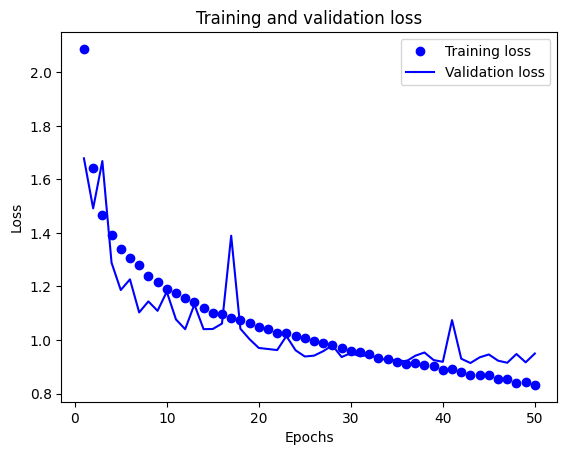

In [ ]:
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

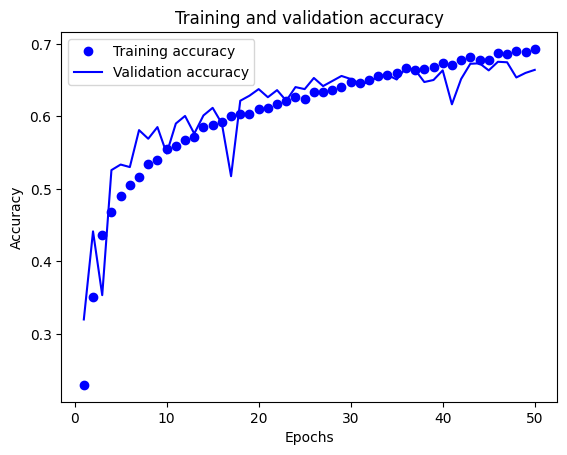

In [ ]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

90/90 [==============================] - 8s 90ms/step


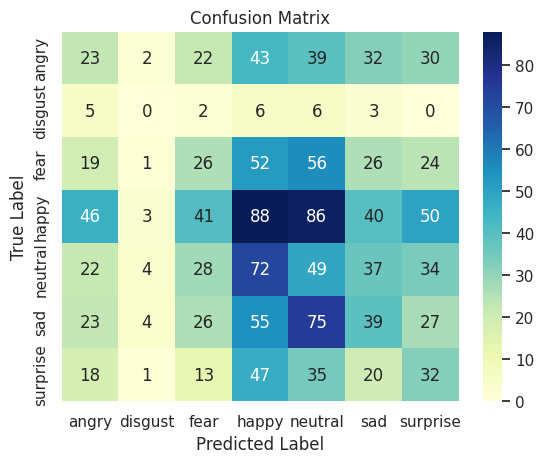

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Emotion_Classes = ['Angry',
                  'Disgust',
                  'Fear',
                  'Happy',
                  'Neutral',
                  'Sad',
                  'Surprise']

In [ ]:
# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_data,
    class_mode="categorical",
    target_size=(48,48),
    color_mode="grayscale",
    shuffle=True,
    batch_size=16,
)

Found 7178 images belonging to 7 classes.


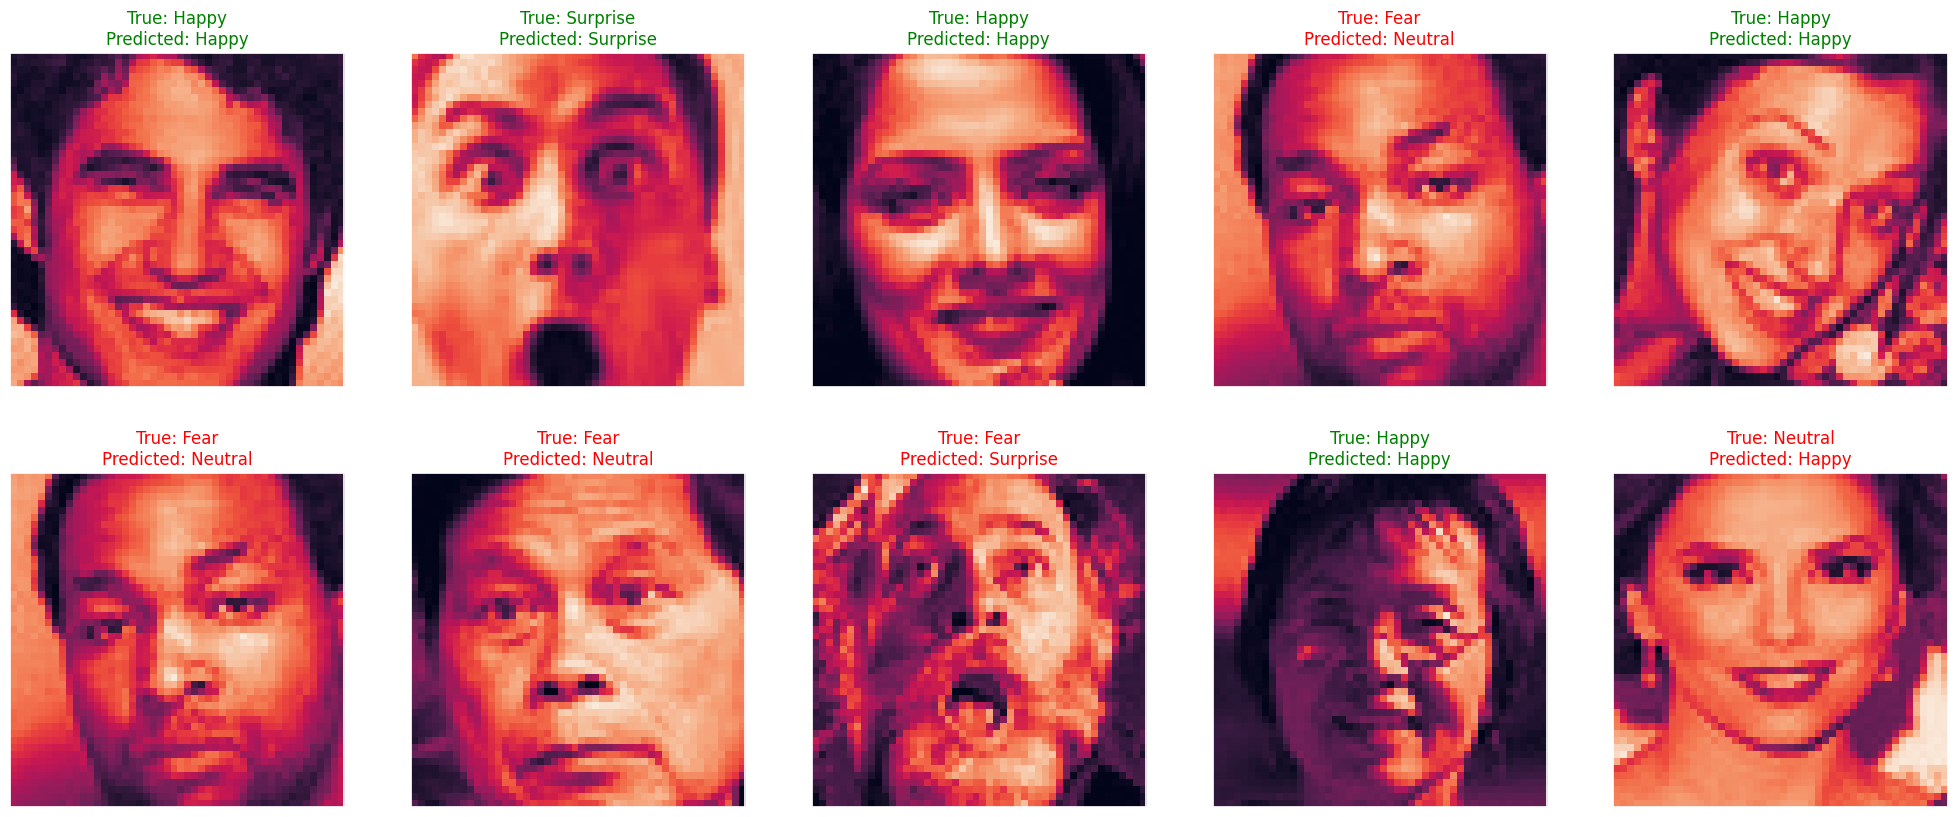

<Figure size 640x480 with 0 Axes>

In [ ]:
# Display 10 random pictures from the dataset with their labels

Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, 16 - 1 , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Prediction = np.argmax(model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

In [ ]:
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

449/449 [==============================] - 42s 94ms/step
Classification Report
              precision    recall  f1-score   support

       angry       0.12      0.10      0.11       958
     disgust       0.03      0.02      0.02       111
        fear       0.13      0.10      0.11      1024
       happy       0.24      0.25      0.25      1774
     neutral       0.17      0.24      0.20      1233
         sad       0.16      0.13      0.14      1247
    surprise       0.11      0.13      0.12       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178

